In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"Potato",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 1500 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Test', 'Train', 'Valid']

In [8]:
len(dataset)

47

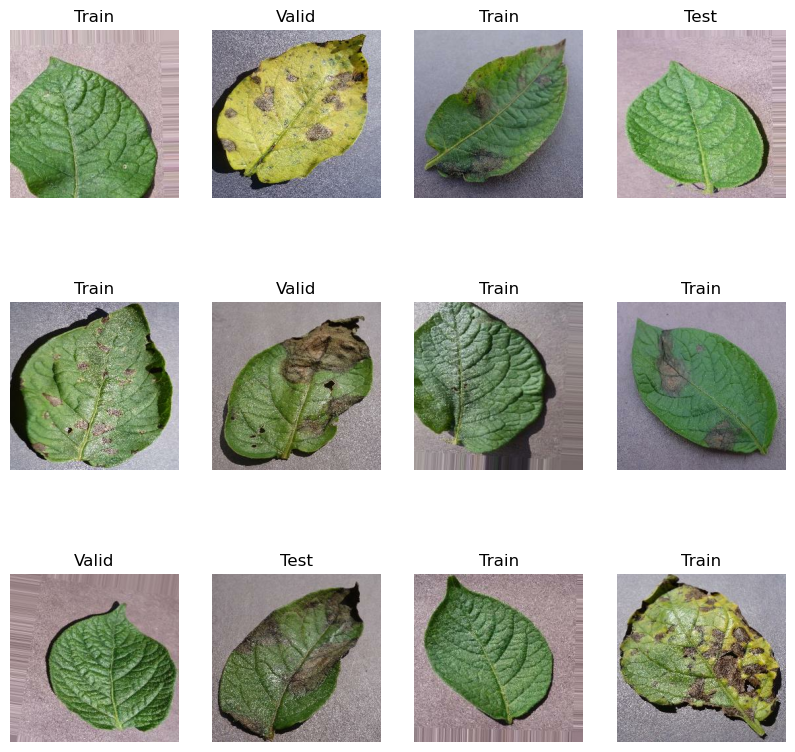

In [9]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")  

In [10]:
len(dataset)

47

In [9]:
#80%==>training
#20%==>10% validation, 10% test

In [11]:
train_size=0.8
len(dataset)*train_size

37.6

In [12]:
train_ds=dataset.take(37)
len(train_ds)

37

In [13]:
test_ds=dataset.skip(37)
len(test_ds)

10

In [14]:
val_size=0.1
len(dataset)*val_size

4.7

In [15]:
val_ds=test_ds.take(4)
len(val_ds)

4

In [16]:
test_ds=test_ds.skip(6)
len(test_ds)

4

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        
        train_ds=ds.take(train_size)
        
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        
        return train_ds, val_ds, test_ds
    

In [19]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

37

In [21]:
len(val_ds)

4

In [22]:
len(test_ds)

6

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)

])

In [25]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [26]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
    
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
EPOCHS=30
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
37/37 [==============================] - 61s 2s/step - loss: 0.9663 - accuracy: 0.5958 - val_loss: 0.9857 - val_accuracy: 0.5703
Epoch 2/30
37/37 [==============================] - 64s 2s/step - loss: 0.9583 - accuracy: 0.5958 - val_loss: 0.9853 - val_accuracy: 0.5703
Epoch 3/30
37/37 [==============================] - 65s 2s/step - loss: 0.9606 - accuracy: 0.5958 - val_loss: 0.9860 - val_accuracy: 0.5703
Epoch 4/30
37/37 [==============================] - 65s 2s/step - loss: 0.9568 - accuracy: 0.5958 - val_loss: 0.9839 - val_accuracy: 0.5703
Epoch 5/30
37/37 [==============================] - 66s 2s/step - loss: 0.9633 - accuracy: 0.5958 - val_loss: 0.9819 - val_accuracy: 0.5703
Epoch 6/30
37/37 [==============================] - 65s 2s/step - loss: 0.9566 - accuracy: 0.5958 - val_loss: 1.0003 - val_accuracy: 0.5703
Epoch 7/30
37/37 [==============================] - 65s 2s/step - loss: 0.9577 - accuracy: 0.5958 - val_loss: 0.9861 - val_accuracy: 0.5703
Epoch 8/30
37/37 [==

In [32]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 2s 329ms/step - loss: 0.9293 - accuracy: 0.6406


In [33]:
scores

[0.9292886853218079, 0.640625]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 37}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history['accuracy']

[0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754,
 0.5957627296447754]

In [38]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

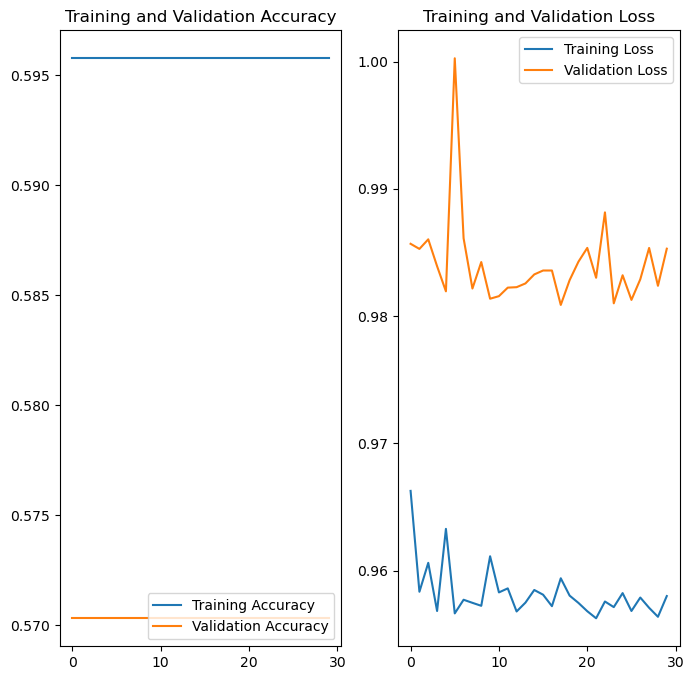

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [41]:
import numpy as np
np.argmax([0.24068171, 0.51445633, 0.24486199])

1

In [2]:

for images_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

NameError: name 'test_ds' is not defined

first image to predict
actual label: Train
1/1 [==============================] - 0s 332ms/step
predicted label: Train


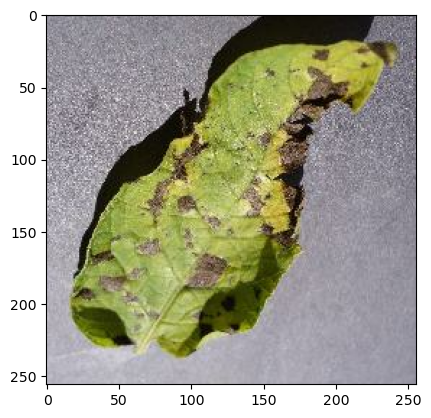

In [48]:
for images_batch, label_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [59]:
# def predict(model,img):
#     img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
#     img_array=tf.expand_dims(img_array,0)#Create a batch
    
#     predictions=model.predict(img_array)
    
#     predicted_class=class_names[np.argmax(predictions[0])]
#     confidence=round(100*(np*max(predictions[0])),2)
#     return predicted_class,confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 71ms/step


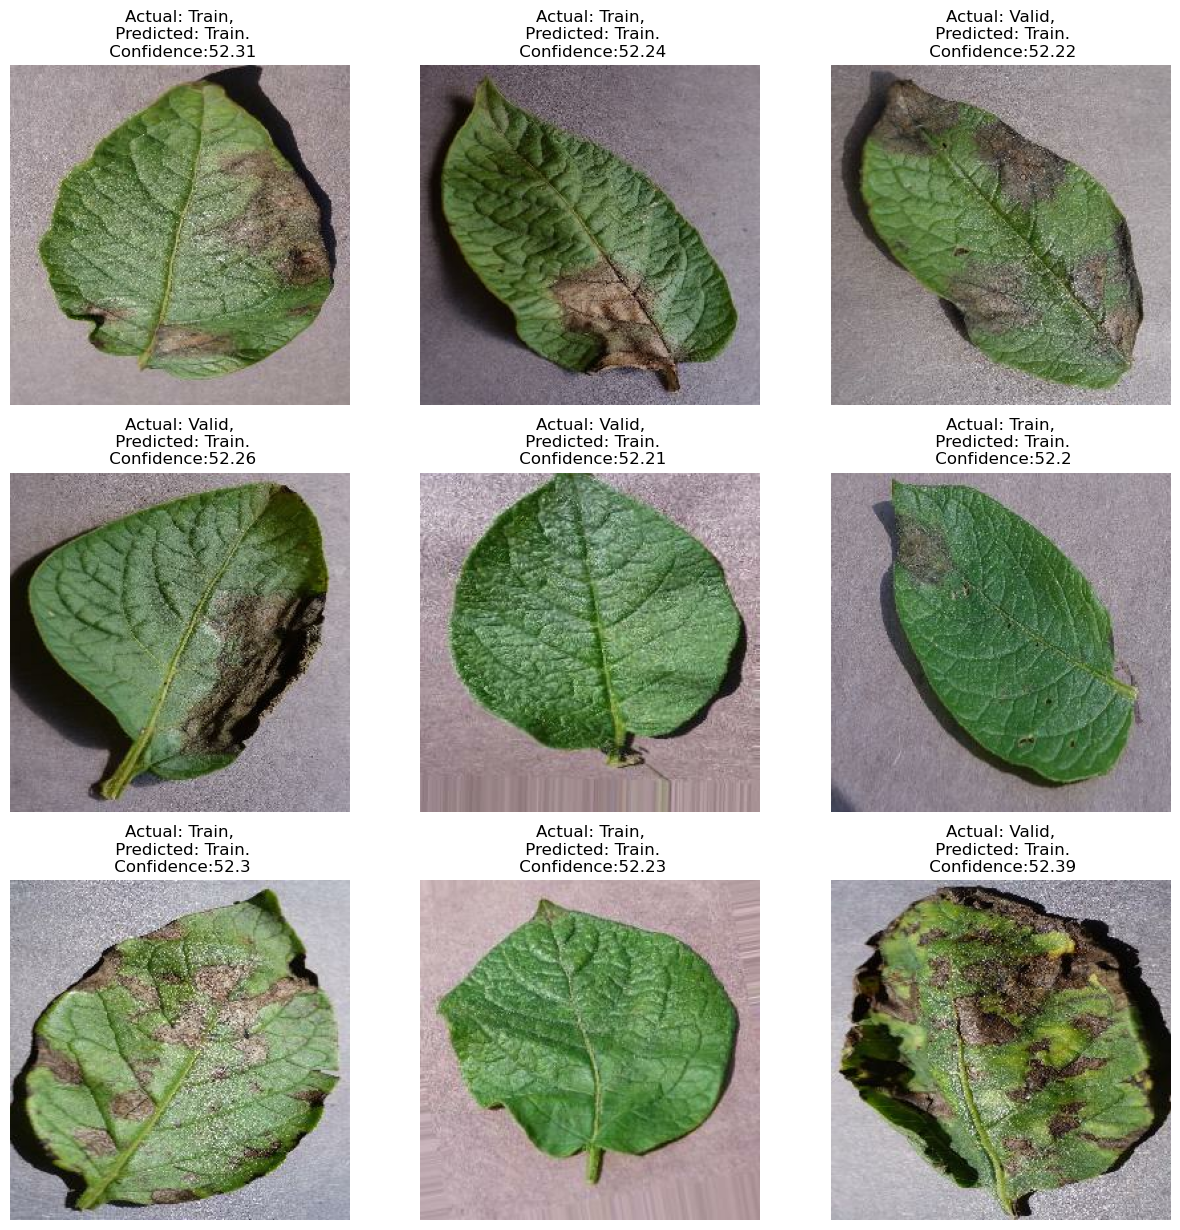

In [63]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}")
        plt.axis("off")

In [68]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
